In [1]:
#from __future__ import print_function
#import random
import numpy as np
#import time
import pandas as pd
#import os
#import math
import seaborn as sns
import matplotlib.pyplot as plt
#from ncpol2sdpa import flatten
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def pareto_frontier(Xs, Ys, maxX = False, maxY = False):
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
    p_front = [myList[0]]    
    for pair in myList[1:]:
        if maxY: 
            if pair[1] >= p_front[-1][1]:
                p_front.append(pair)
        else:
            if pair[1] <= p_front[-1][1]:
                p_front.append(pair)
    p_frontX = [pair[0] for pair in p_front]
    p_frontY = [pair[1] for pair in p_front]
    return p_frontX, p_frontY

# Multiple Trade-Offs

In [3]:
num_trial=1
PO=pd.read_csv('ParetoOptimal_R'+str(num_trial)+'.csv', header=0)

x2=PO["Intra_Fair2"]
x3=PO["Intra_Fair3"]
x4=PO["Intra_Fair4"]

y1=PO["Inter_Fair1"]
y2=PO["Inter_Fair2"]
y3=PO["Inter_Fair3"]

KDD=PO[PO["lam2"]==0]
FAIR=PO[PO["lam2"]!=0]

x2_kdd=KDD["Intra_Fair2"]
x3_kdd=KDD["Intra_Fair3"]
x4_kdd=KDD["Intra_Fair4"]

y1_kdd=KDD["Inter_Fair1"]
y2_kdd=KDD["Inter_Fair2"]
y3_kdd=KDD["Inter_Fair3"]

x2_fair=FAIR["Intra_Fair2"]
x3_fair=FAIR["Intra_Fair3"]
x4_fair=FAIR["Intra_Fair4"]

y1_fair=FAIR["Inter_Fair1"]
y2_fair=FAIR["Inter_Fair2"]
y3_fair=FAIR["Inter_Fair3"]

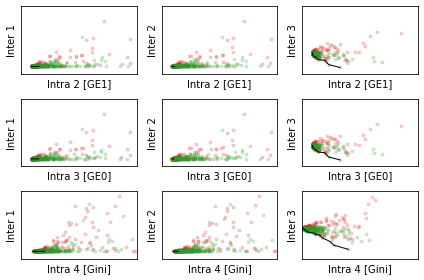

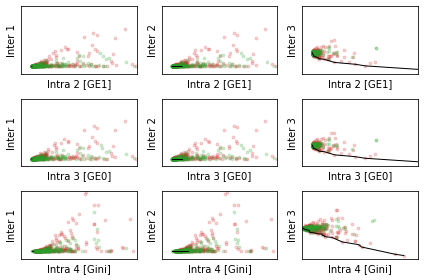

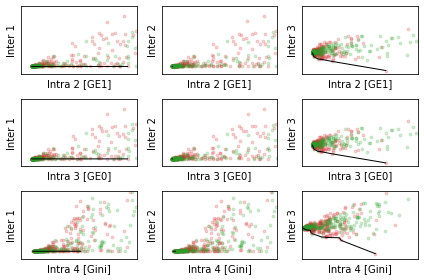

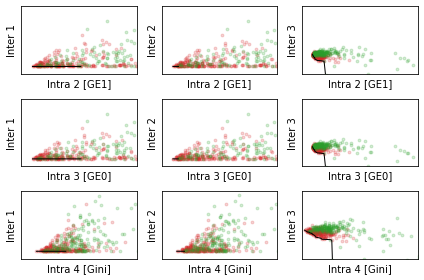

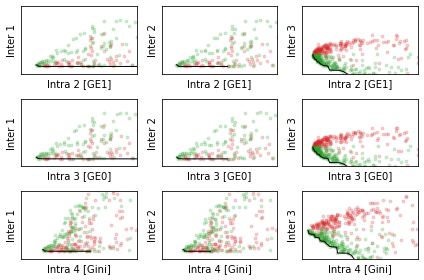

In [8]:
num_trials = 5
for trial in range(1,num_trials+1):
    plot_trials(trial);

In [7]:
def plot_trials(num_trial):

    # load data -------------------------------------------------------
    PO=pd.read_csv('ParetoOptimal_R'+str(num_trial)+'.csv', header=0)

    x2=PO["Intra_Fair2"]
    x3=PO["Intra_Fair3"]
    x4=PO["Intra_Fair4"]

    y1=PO["Inter_Fair1"]
    y2=PO["Inter_Fair2"]
    y3=PO["Inter_Fair3"]

    KDD=PO[PO["lam2"]==0]
    FAIR=PO[PO["lam2"]!=0]

    x2_kdd=KDD["Intra_Fair2"]
    x3_kdd=KDD["Intra_Fair3"]
    x4_kdd=KDD["Intra_Fair4"]

    y1_kdd=KDD["Inter_Fair1"]
    y2_kdd=KDD["Inter_Fair2"]
    y3_kdd=KDD["Inter_Fair3"]

    x2_fair=FAIR["Intra_Fair2"]
    x3_fair=FAIR["Intra_Fair3"]
    x4_fair=FAIR["Intra_Fair4"]

    y1_fair=FAIR["Inter_Fair1"]
    y2_fair=FAIR["Inter_Fair2"]
    y3_fair=FAIR["Inter_Fair3"]

    # Plot ------------------------------------------------------------
    alpha=0.2
    size=8

    fig, axes = plt.subplots(3, 3)
    #, figsize=(9,8)
    # x2 | y1
    plt.subplot(331)

    PF=pareto_frontier(x2,y1,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y1_pareto = PF[1]

    plt.scatter(x2_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 2 [GE1]')
    plt.ylabel('Inter 1')
    plt.xlim((-10**(-14),10**(-13)))
    plt.ylim((-10**(-14),0.8*10**(-13)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x2 | y2
    plt.subplot(332)
    PF=pareto_frontier(x2,y2,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y2_pareto = PF[1]

    plt.scatter(x2_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 2 [GE1]')
    plt.ylabel('Inter 2')
    plt.xlim((-10**(-14),10**(-13)))
    plt.ylim((-10**(-14),0.8*10**(-13)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x2 | y3
    plt.subplot(333)
    PF=pareto_frontier(x2,y3,maxX = False, maxY = False)
    x2_pareto = PF[0]
    y3_pareto = PF[1]

    plt.scatter(x2_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x2_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x2_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 2 [GE1]')
    plt.ylabel('Inter 3')
    plt.xlim((-10**(-13),10**(-12)))
    plt.ylim((9.90094*10**(-3),9.9011*10**(-3)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x3 | y1
    plt.subplot(334)
    PF=pareto_frontier(x3,y1,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y1_pareto = PF[1]

    plt.scatter(x3_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 3 [GE0]')
    plt.ylabel('Inter 1')
    plt.xlim((-10**(-14),10**(-13)))
    plt.ylim((-10**(-14),0.8*10**(-13)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x3 | y2
    plt.subplot(335)
    PF=pareto_frontier(x3,y2,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y2_pareto = PF[1]

    plt.scatter(x3_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 3 [GE0]')
    plt.ylabel('Inter 2')
    plt.xlim((-10**(-14),10**(-13)))
    plt.ylim((-10**(-14),0.8*10**(-13)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x3 | y3
    plt.subplot(336)
    PF=pareto_frontier(x3,y3,maxX = False, maxY = False)
    x3_pareto = PF[0]
    y3_pareto = PF[1]

    plt.scatter(x3_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x3_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x3_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 3 [GE0]')
    plt.ylabel('Inter 3')
    plt.xlim((-10**(-13),10**(-12)))
    plt.ylim((9.90094*10**(-3),9.9011*10**(-3)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x4 | y1
    plt.subplot(337)
    PF=pareto_frontier(x4,y1,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y1_pareto = PF[1]

    plt.scatter(x4_kdd,y1_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y1_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y1_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 4 [Gini]')
    plt.ylabel('Inter 1')
    plt.xlim((-5*10**(-8),5*10**(-7)))
    plt.ylim((-10**(-14),0.8*10**(-13)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x4 | y2
    plt.subplot(338)
    PF=pareto_frontier(x4,y2,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y2_pareto = PF[1]

    plt.scatter(x4_kdd,y2_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y2_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y2_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 4 [Gini]')
    plt.ylabel('Inter 2')
    plt.xlim((-5*10**(-8),5*10**(-7)))
    plt.ylim((-10**(-14),0.8*10**(-13)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()
    #plt.savefig('ParetoFront.pdf', bbox_inches = 'tight')

    # x4 | y3
    plt.subplot(339)
    PF=pareto_frontier(x4,y3,maxX = False, maxY = False)
    x4_pareto = PF[0]
    y3_pareto = PF[1]

    plt.scatter(x4_kdd,y3_kdd,alpha=alpha,s=size,c='tab:red')
    plt.scatter(x4_fair,y3_fair,alpha=alpha,s=size,c='tab:green') #turquoise
    plt.plot(x4_pareto, y3_pareto, color='black',linestyle='-',linewidth=1) #magenta
    #,marker='s',markerfacecolor='none',markersize=3,alpha=1
    plt.xlabel('Intra 4 [Gini]')
    plt.ylabel('Inter 3')
    plt.xlim((-10**(-13),10**(-6)))
    plt.ylim((9.90094*10**(-3),9.90105*10**(-3)))
    plt.xticks([])
    plt.yticks([])
    #plt.legend(('Pareto front', 'Intra 5 + Inter 3 (L)', 'Sühr et al. 2019 (L)'), loc='upper left')  
    #plt.show()

    # Save Images --------------------------------------------------------------------------
    #plt.suptitle('Trial '+str(num_trial))
    #fig.legend(['Pareto front', 'Sühr et al. 2019 (L)', 'Intra 5 + Inter 3 (L)'],bbox_to_anchor=(0.5, 0., 0.8, 0.5),borderaxespad=0,frameon=False) #bbox_to_anchor=(0.5, 0., 0.8, 0.5)
    plt.tight_layout() 
    plt.savefig('ParetoFront_R'+str(num_trial)+'.pdf',bbox_inches = 'tight') 

# Cross-Validation

[Text(0.5, 20.49999999999995, 'common xlabel'),
 Text(9.875, 0.5, 'common ylabel')]

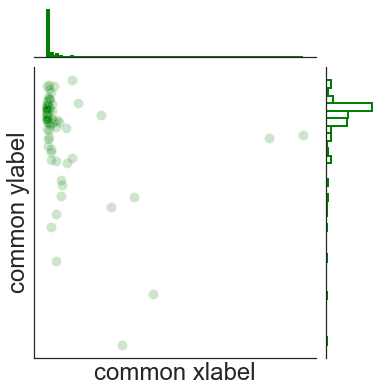

In [11]:
i=2
j=3
g = sns.JointGrid()
sns.set(style='white',font_scale=2,palette=['green'])
x, y = sub['Intra_Fair'+str(i)],sub['Inter_Fair'+str(j)]
sns.scatterplot(x=x, y=y, s=100, alpha=.2,ax=g.ax_joint)
sns.histplot(x=x, fill=False,linewidth=2,ax=g.ax_marg_x)
sns.histplot(y=y, fill=False,linewidth=2,ax=g.ax_marg_y)
g.ax_marg_x.set_xticks([])
g.ax_marg_y.set_yticks([])
g.ax_joint.set(xlabel='common xlabel', ylabel='common ylabel')

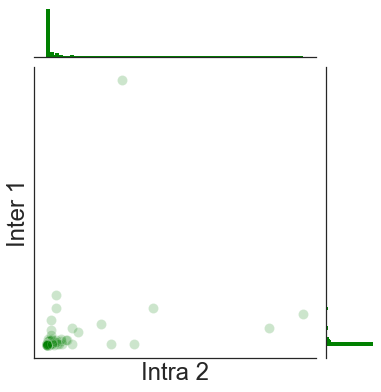

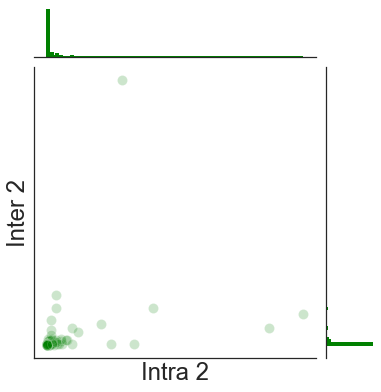

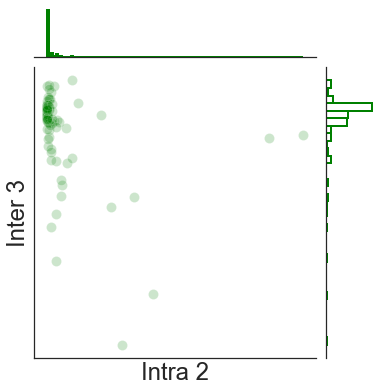

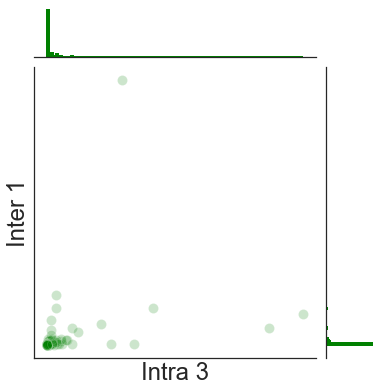

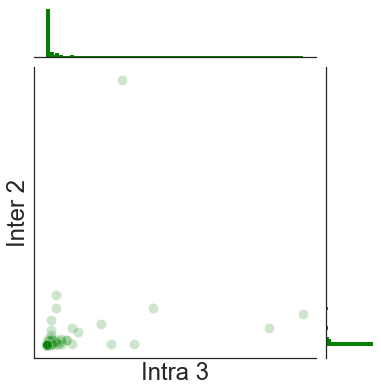

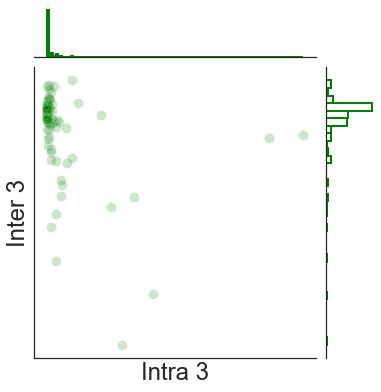

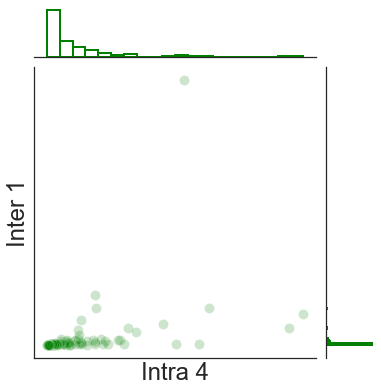

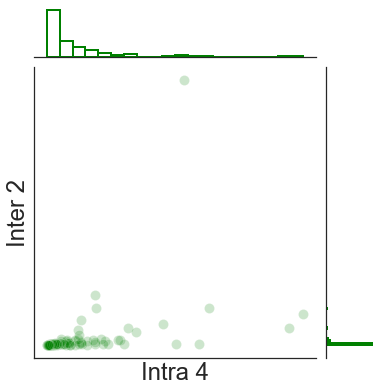

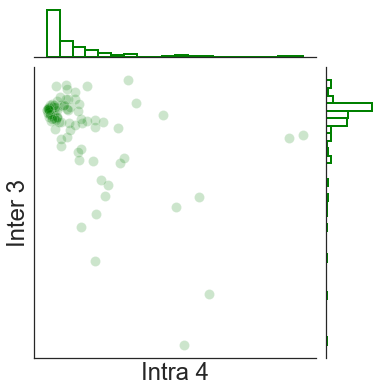

In [13]:
CROSS=pd.read_csv('ParetoOptimal_random.csv', header=0)
CROSS['Trial'].astype('object')
sub=CROSS[0:100]

for i in range(2,5):
    for j in range(1,4):
        g = sns.JointGrid()
        sns.set(style='white',font_scale=2,palette=['green'])
        x, y = sub['Intra_Fair'+str(i)],sub['Inter_Fair'+str(j)]
        sns.scatterplot(x=x, y=y, s=100, alpha=.2,ax=g.ax_joint)
        sns.histplot(x=x, fill=False,linewidth=2,ax=g.ax_marg_x)
        sns.histplot(y=y, fill=False,linewidth=2,ax=g.ax_marg_y)
        g.ax_marg_x.set_xticks([])
        g.ax_marg_y.set_yticks([])
        g.ax_joint.set(xlabel='Intra '+str(i), ylabel='Inter '+str(j))
        plt.savefig('CrossValidation_Inter'+str(j)+'Intra'+str(i)+'.pdf',bbox_inches = 'tight') 

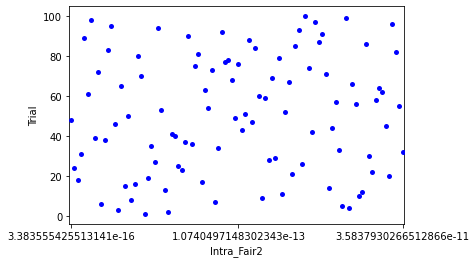

In [35]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=CROSS, x='Intra_Fair2', y='Trial',color='blue')
x1 =[0,50,99]
#x1 = [*range(0,100,45)]
ax.set_xticks(x1)

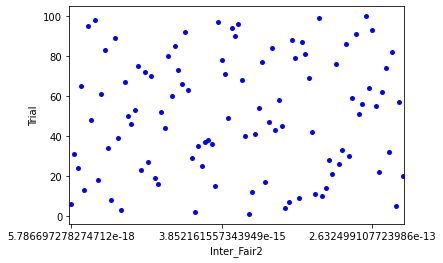

In [31]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=CROSS, x='Inter_Fair2', y='Trial',color='blue')
x1 = [*range(0,100,45)]
ax.set_xticks(x1)